# Verifica Fila A

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/platea.csv')
df

,area,nome_area,fascia_anagrafica,totale_popolazione
0,ABR,Abruzzo,12-19,94727
1,ABR,Abruzzo,20-29,125230
2,ABR,Abruzzo,30-39,146965
3,ABR,Abruzzo,40-49,187162
4,ABR,Abruzzo,50-59,208686
...,...,...,...,...
163,VEN,Veneto,40-49,715790
164,VEN,Veneto,50-59,806474
165,VEN,Veneto,60-69,610635
166,VEN,Veneto,70-79,494721


Visualizzare la popolazione complessiva di tutte le regioni

In [15]:
df['totale_popolazione'].sum()

54009944

Visualizzare la popolazione di una regione inserita dall’utente. Controllare il dato inserito: se la regione
non esiste dare un opportuno messaggio, altrimenti dare il messaggio “La regione &lt;nome&gt; ha &lt;totale&gt;
abitanti”

In [16]:
regione = input()

popolazione = df[df['nome_area']==regione].totale_popolazione.sum()

if popolazione > 0:
   print('La regione', regione, 'ha',popolazione,'abitanti')
else:
  print('regione non disponibile')

Lombardia
La regione Lombardia ha 9246804 abitanti


Visualizzare la popolazione di ogni regione. Visualizzare il nome della regione e il numero di abitanti.
Ordinare in ordine decrescente sul numero di abitanti (dalla regione che ha più abitanti a quella che ne
ha di meno)

In [ ]:
df1 = df.groupby('nome_area')[['totale_popolazione']].sum().sort_values(by = 'totale_popolazione', ascending= False).reset_index()
df1

Visualizzare il grafico a barre orizzontali relativo all’esercizio 3. Inserire il titolo, i nomi degli assi e la
legenda. Fare in modo che i colori delle barre siano gradazioni dello stesso colore.

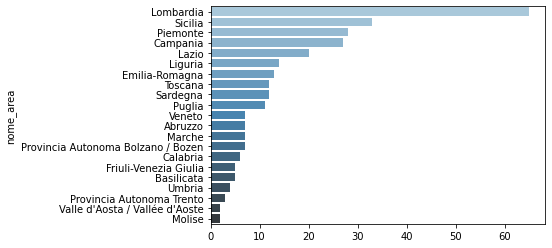

In [87]:
import seaborn as sns
fig = plt.figure()
sns.barplot(x= df1.values, y= df1.index, palette='Blues_d')

Eliminare la colonna ‘area’

In [19]:
df.drop(columns=['area'])

,nome_area,fascia_anagrafica,totale_popolazione
0,Abruzzo,12-19,94727
1,Abruzzo,20-29,125230
2,Abruzzo,30-39,146965
3,Abruzzo,40-49,187162
4,Abruzzo,50-59,208686
...,...,...,...
163,Veneto,40-49,715790
164,Veneto,50-59,806474
165,Veneto,60-69,610635
166,Veneto,70-79,494721


Visualizzare le fasce anagrafiche che hanno un numero di persone compreso tra 5 e 7 milioni

In [20]:
df.loc[(df['totale_popolazione']<= 7000000) & (df['totale_popolazione'] >= 5000000),['fascia_anagrafica']]

,fascia_anagrafica


In [37]:
df1 = df.groupby('fascia_anagrafica')[['totale_popolazione']].sum().reset_index()
df2 = df1.loc[(df1['totale_popolazione']<= 7000000) & (df1['totale_popolazione'] >= 5000000),['fascia_anagrafica','totale_popolazione']]
df2

,fascia_anagrafica,totale_popolazione
1,20-29,6013709
2,30-39,6794332
6,70-79,6019293


Visualizzare il grafico a torta dei dati dell’esercizio 6. Visualizzare negli spicchi sia il numero assoluto
degli abitanti (ad esempio 4345767) sia la percentuale

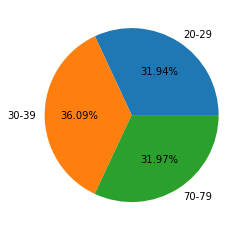

In [38]:
fig = plt.figure()
ax = plt.axes()
ax.pie(df2['totale_popolazione'], labels=df2['fascia_anagrafica'], autopct='%1.2f%%')


plt.show()

8. Visualizzare un nuovo grafico con i grafici precedenti. Il nuovo grafico deve avere due colonne e tre
righe e deve contenere nella prima colonna tre volte il grafico a barre e nelle seconda colonna tre volte
il grafico a torta

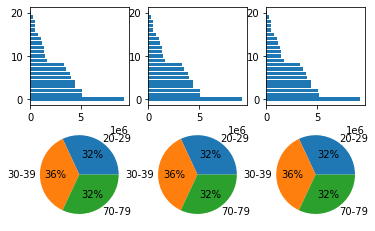

In [46]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3)
ax1.barh(df1.index, df1['totale_popolazione'], label='Presidi Ospedalieri per Regioni')
ax2.barh(df1.index, df1['totale_popolazione'], label='Presidi Ospedalieri per Regioni')
ax3.barh(df1.index, df1['totale_popolazione'], label='Presidi Ospedalieri per Regioni')

ax4.pie(df2['totale_popolazione'], labels=df2['fascia_anagrafica'], autopct='%1.0f%%')
ax5.pie(df2['totale_popolazione'], labels=df2['fascia_anagrafica'], autopct='%1.0f%%')
ax6.pie(df2['totale_popolazione'], labels=df2['fascia_anagrafica'], autopct='%1.0f%%')
plt.show()

Salvare il grafico in un file .png

In [ ]:
fig.savefig("output.png")